In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Input,Layer
import tensorflow as tf

In [3]:
try:
    dirs_list=[
        os.path.join('data','positive'),
        os.path.join('data','negative'),
        os.path.join('data','anchor'),
    ]
except FileExistsError:
    pass
# dirs_dict.keys()

In [4]:
# for i in range(len(dirs_list)):
#     os.makedirs(dirs_list[i])

In [5]:
!tar -xf lfw.tgz

tar: Error opening archive: Failed to open 'lfw.tgz'


In [6]:
try:
    for images_path in os.listdir('lfw'):
        for image in os.listdir(os.path.join('lfw',images_path)):
            exis_path=os.path.join('lfw',images_path,image)
            new_path=os.path.join(dirs_list[1],image)
            os.replace(exis_path,new_path)
except FileNotFoundError:
    pass

In [7]:
import uuid
uuid.uuid1()

UUID('e0f7b6ae-3b94-11ef-b75d-e4a4713fe895')

In [8]:
'{}.jpg'.format(uuid.uuid1())

'e0fbfe9e-3b94-11ef-8152-e4a4713fe895.jpg'

In [27]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    
    ret,frame=cap.read()
    
    frame=frame[100:100+250,200:200+250,:]
    
    if cv2.waitKey(1) & 0XFF== ord('p'):
        imgname=os.path.join('data','positive','{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        
    if cv2.waitKey(1) & 0XFF== ord('a'):
        imgname=os.path.join('data','anchor','{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        
    cv2.imshow('Image Collection',frame)
    
    if cv2.waitKey(1) & 0XFF== ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
frame.shape

(250, 250, 3)

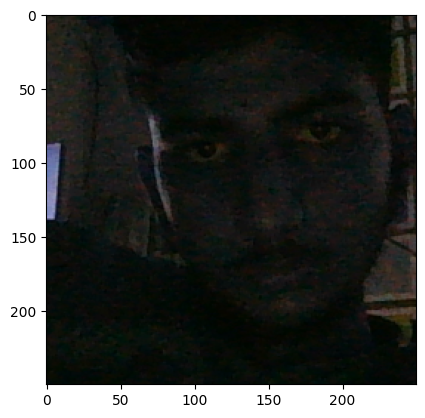

In [11]:
plt.imshow(frame)

In [12]:
anchor=tf.data.Dataset.list_files(dirs_list[-1]+'/*.jpg').take(300)
positive=tf.data.Dataset.list_files(dirs_list[0]+'/*.jpg').take(300)
negative=tf.data.Dataset.list_files(dirs_list[1]+'/*.jpg').take(300)

In [13]:
dir_test=anchor.as_numpy_iterator()
dir_test.next()

b'data\\anchor\\c7a5d65c-38a8-11ef-af5e-e4a4713fe895.jpg'

In [14]:
tf_byte_img=tf.io.read_file('data\\anchor\\c8aca7ad-38a8-11ef-b458-e4a4713fe895.jpg')
tf_decoded_byte_img=tf.io.decode_jpeg(tf_byte_img)
cv2_img=cv2.imread('data\\anchor\\c8aca7ad-38a8-11ef-b458-e4a4713fe895.jpg')

In [15]:
tf_decoded_byte_img

<tf.Tensor: shape=(250, 250, 3), dtype=uint8, numpy=
array([[[ 7, 35, 23],
        [ 7, 35, 23],
        [ 4, 31, 24],
        ...,
        [ 0, 15,  8],
        [ 1, 13,  9],
        [ 1, 13,  9]],

       [[ 5, 32, 23],
        [ 9, 36, 27],
        [ 9, 36, 29],
        ...,
        [ 0, 14,  9],
        [ 3, 15, 11],
        [ 3, 15, 11]],

       [[ 8, 37, 32],
        [11, 40, 35],
        [13, 40, 35],
        ...,
        [ 0, 11,  9],
        [ 0, 11,  9],
        [ 0, 11,  9]],

       ...,

       [[ 2, 18,  7],
        [ 7, 23, 12],
        [ 7, 20, 11],
        ...,
        [27, 49, 46],
        [24, 44, 43],
        [19, 39, 38]],

       [[10, 23, 16],
        [ 9, 22, 15],
        [ 6, 19, 12],
        ...,
        [22, 43, 34],
        [13, 33, 24],
        [11, 30, 24]],

       [[11, 23, 19],
        [ 9, 21, 17],
        [ 6, 18, 14],
        ...,
        [27, 49, 36],
        [19, 39, 28],
        [18, 38, 27]]], dtype=uint8)>

In [16]:
cv2_img.shape

(250, 250, 3)

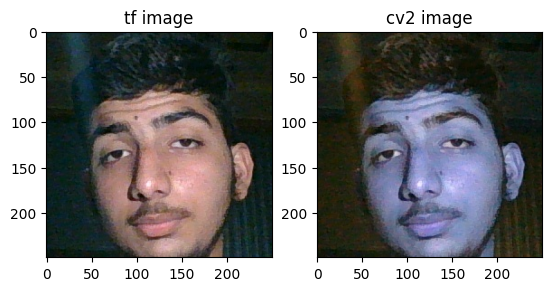

In [17]:
plt.subplot(121)
plt.title('tf image')
plt.imshow(tf_decoded_byte_img)
plt.subplot(122)
plt.title('cv2 image')
plt.imshow(cv2_img)

In [18]:
# So that's why we gonna use tensorflow api

In [3]:
def preprocess(file_path):
    byte_img=tf.io.read_file(file_path)
    decoded_byte_img=tf.io.decode_jpeg(byte_img)
    img=tf.image.resize(decoded_byte_img,(100,100))
    img=img/255
    return img

In [20]:
img=preprocess('data\\anchor\\c8aca7ad-38a8-11ef-b458-e4a4713fe895.jpg')

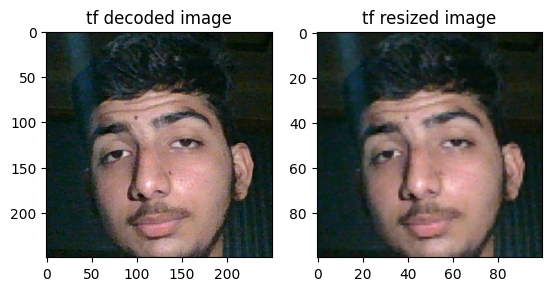

In [21]:
plt.subplot(121)
plt.title('tf decoded image')
plt.imshow(tf_decoded_byte_img)
plt.subplot(122)
plt.title('tf resized image')
plt.imshow(img)

In [22]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [23]:
positives=tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives=tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)

In [24]:
sample=data.as_numpy_iterator()

In [25]:
example=sample.next()
example

(b'data\\anchor\\bf0dc009-38a8-11ef-9f66-e4a4713fe895.jpg',
 b'data\\positive\\b70996bb-38a9-11ef-abcb-e4a4713fe895.jpg',
 1.0)

In [26]:
def preprocess_twin(input_img,validate_img,label):
    return (preprocess(input_img),preprocess(validate_img),label)

In [27]:
res=preprocess_twin(*example)
res

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.05906863, 0.14142157, 0.08259804],
         [0.04411765, 0.13137256, 0.08627451],
         [0.04583333, 0.12745099, 0.08455882],
         ...,
         [0.02009804, 0.06544118, 0.02230392],
         [0.00588235, 0.05122549, 0.01397059],
         [0.01397059, 0.05465686, 0.01715686]],
 
        [[0.04901961, 0.12769608, 0.07794118],
         [0.06691176, 0.14803922, 0.11544117],
         [0.0632353 , 0.1392157 , 0.12279411],
         ...,
         [0.01764706, 0.07254902, 0.01102941],
         [0.00367647, 0.06053922, 0.00514706],
         [0.01176471, 0.06862745, 0.02058824]],
 
        [[0.0747549 , 0.13014705, 0.08872549],
         [0.05514706, 0.11568628, 0.09730392],
         [0.06740196, 0.125     , 0.12181372],
         ...,
         [0.00661765, 0.06127451, 0.01960784],
         [0.00171569, 0.05710784, 0.03088235],
         [0.        , 0.05      , 0.03627451]],
 
        ...,
 
        [[0.03382353, 0.09656863

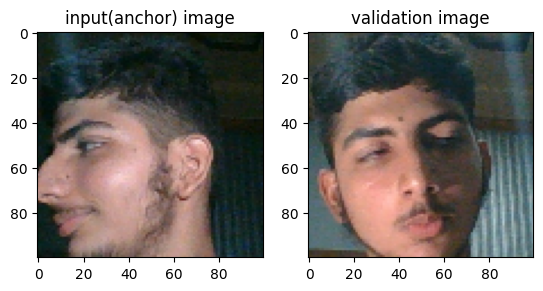

In [28]:
plt.subplot(121)
plt.title('input(anchor) image')
plt.imshow(res[0])
plt.subplot(122)
plt.title('validation image')
plt.imshow(res[1])

In [29]:
data=data.map(preprocess_twin)
data=data.cache()
data=data.shuffle(buffer_size=1024)

In [54]:
samples=data.as_numpy_iterator()
samp=samples.next()

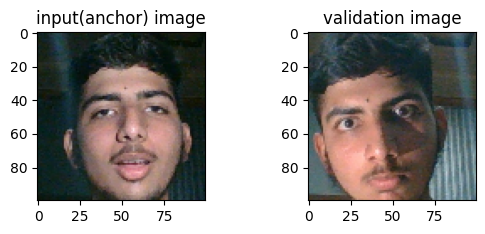

In [31]:
# plt.imshow(samp[1])
plt.subplot(221)
plt.title('input(anchor) image')
plt.imshow(samp[0])
plt.subplot(222)
plt.title('validation image')
plt.imshow(samp[1])

In [32]:
samp[-1]

1.0

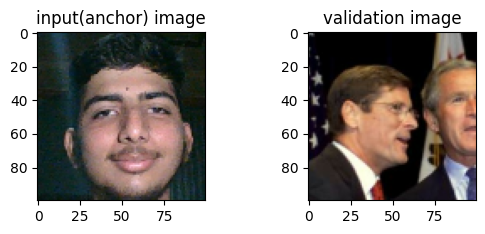

In [55]:
plt.subplot(221)
plt.title('input(anchor) image')
plt.imshow(samp[0])
plt.subplot(222)
plt.title('validation image')
plt.imshow(samp[1])

In [56]:
samp[-1]

0.0

In [57]:
round(len(data)*0.7)

420

In [36]:
train_data=data.take(round(len(data)*0.7))
train_data=train_data.batch(16)
train_data=train_data.prefetch(8)

In [37]:
test_data=data.skip(round(len(data)*0.7))
test_data=test_data.take(round(len(data)*0.3))
test_data=test_data.batch(16)
test_data=test_data.prefetch(4)

In [38]:
print(train_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


In [39]:
def make_embedding():
    inp=Input(shape=(100,100,3),name='input_image')
    
    c1=Conv2D(64,(10,10),activation='relu')(inp)
    m1=MaxPool2D(64,(2,2),padding='same')(c1)

    c2=Conv2D(128,(7,7),activation='relu')(m1)
    m2=MaxPool2D(64,(2,2),padding='same')(c2)

    c3=Conv2D(128,(4,4),activation='relu')(m2)
    m3=MaxPool2D(64,(2,2),padding='same')(c3)

    c4=Conv2D(256,(4,4),activation='relu')(m3)
    
    f1=Flatten()(c4)
    d1=Dense(4096,activation='sigmoid')(f1)
    return Model(inputs=[inp],outputs=[d1],name='Embedding')

In [40]:
embedding=make_embedding()

In [41]:
embedding.summary()

Model: "Embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()

    def call(self,input_embedding,validation_embedding):
        return tf.subtract(input_embedding , validation_embedding)[0]

In [43]:
l1=L1Dist()
l1

<L1Dist name=l1_dist, built=False>

In [44]:
input_embedding=Input(name='input_img',shape=(100,100,3,))
validation_embedding=Input(name='validation_img',shape=(100,100,3))

In [45]:
siamese_layer=L1Dist()
siamese_layer(input_embedding,validation_embedding)

<KerasTensor shape=(100, 100, 3), dtype=float32, sparse=False, name=keras_tensor_9>

In [46]:
distaces=siamese_layer(embedding(input_embedding),embedding(validation_embedding))
distaces

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_12>

In [85]:
# @tf.function
def make_siamese_model():
    # f1=Flatten()
    input_image=Input(name='input_img',shape=(100,100,3,))
    validation_image=Input(name='validation_img',shape=(100,100,3,))

    siamese_layer=L1Dist()
    siamese_layer._name='distances'
    distances=siamese_layer(embedding(input_image),embedding(validation_image))

    classifier=Dense(1,activation='sigmoid')(distances)

    # classifier=tf.squeeze(classifier)
    return Model(inputs=[input_image,validation_image],outputs=classifier,name='Siamese Neural Network')

In [86]:
siamese_model=make_siamese_model()
siamese_model.summary()

Model: "Siamese Neural Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_3 (L1Dist)            │ (None, 4096)              │               0 │ Embedding[4][0],           │
│                               │                           │                 │ Embedding[5][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
binary_cross_loss=tf.losses.BinaryCrossentropy()
opt=tf.keras.optimizers.Adam(1e-4)

In [99]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

In [9]:
# @tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        X=batch[:2]
        # X=np.array(X).reshape(100,100,3,)
        y=batch[2]
        # print(X)
        yhat=siamese_model(X,training=True)
        loss=binary_cross_loss(y,yhat)
    grad=tape.gradient(loss,siamese_model.trainable_variables)
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))

In [108]:
# @tf.function
def train(data,EPOCHS):
    for epoch in range(1,EPOCHS+1):
        print(f'\n epoch {epoch}/{EPOCHS}')
        progbar=tf.keras.utils.Progbar(len(data))
        for idx,batch in enumerate(data):
            # print(batch)
            train_step(batch)
            progbar.update(idx+1)

In [109]:
train(train_data,5)


 epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 662s 24s/step

 epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 652s 24s/step

 epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 663s 25s/step

 epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 662s 25s/step

 epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 664s 25s/step


In [70]:
test_sample=train_data.as_numpy_iterator()

In [83]:
batch1=test_sample.next()
X_test_sample=batch1[:2]

In [84]:
np.array(X_test_sample).shape

(2, 16, 100, 100, 3)

In [136]:
test_input,test_val,y_true=test_data.as_numpy_iterator().next()

predictions=siamese_model.predict([test_input,test_val])
print(predictions)

y_pred=[]
for prediction in predictions:
    if prediction>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(y_pred)

print(classification_report(y_true,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[3.4695708e-03]
 [3.5884867e-05]
 [9.9999970e-01]
 [9.9997842e-01]
 [7.8351637e-05]
 [9.9978679e-01]
 [9.9997020e-01]
 [6.1343094e-06]
 [3.4759706e-04]
 [9.9996722e-01]
 [9.9489069e-01]
 [9.9998951e-01]
 [4.9033652e-06]
 [9.9413258e-01]
 [6.4570158e-05]
 [9.9885947e-01]]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [128]:
from sklearn.metrics import accuracy_score,classification_report

In [137]:
siamese_model.save('siamese_model.h5')

In [6]:
model=tf.keras.models.load_model('siamese_model.h5',custom_objects={'L1Dist':L1Dist,'BinaryCrossentropy':tf.keras.losses.BinaryCrossentropy})

In [21]:
def verify(model,detection_threshold,verification_threshold):
    results=[]
    for image in os.listdir(os.path.join('application_data','verification_image')):
        input_image=preprocess(os.path.join('application_data','input_image','input_image.jpg'))
        validation_image=preprocess(os.path.join('application_data','verification_image',image))
        result=model.predict(list(np.expand_dims([input_image,validation_image],axis=1)))
        results.append(result)
    detection=np.sum(np.squeeze(np.array(results))>detection_threshold)
    verification=detection/len(os.listdir(os.path.join('application_data','verification_image')))
    verified=verification>verification_threshold
    return results,verified

In [19]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    frame=frame[100:100+250,200:200+250,:]
    cv2.imshow('Verification',frame)
    if cv2.waitKey(1) & 0XFF==ord('v'):
        img_name=os.path.join('application_data','input_image','input_image.jpg')
        cv2.imwrite(img_name,frame)    
        resluts,verified=verify(model,0.5,0.5)
        print(verified)
    
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 